Helyszín eloszlása

# 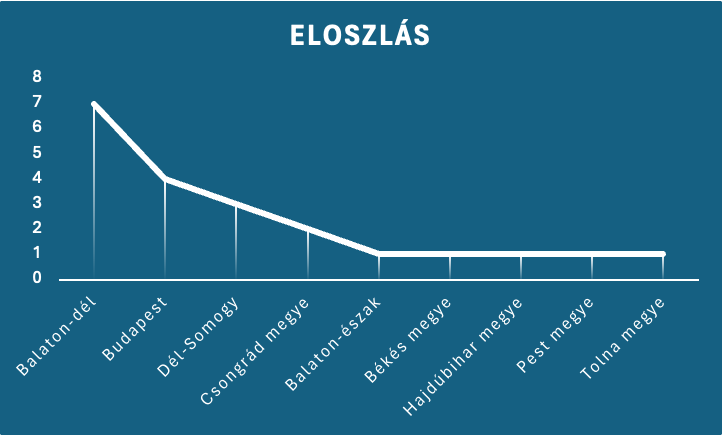

In [12]:
SELECT hely, COUNT(*) as Darab,
(COUNT(*) * 100 / (SELECT COUNT(*) FROM szallashely)) AS százalék 
FROM szallashely
GROUP BY hely
ORDER BY százalék DESC;

(9 rows affected)

Total execution time: 00:00:00.029

hely,Darab,százalék
Balaton-dél,7,33
Budapest,4,19
Dél-Somogy,3,14
Csongrád megye,2,9
Balaton-észak,1,4
Békés megye,1,4
Hajdúbihar megye,1,4
Pest megye,1,4
Tolna megye,1,4


2\. Szállásonként legtöbb illetve legkevesebb foglalt napok száma

In [28]:
SELECT szallas_nev, MAX(DATEDIFF(DAY,METTOL,MEDDIG)) as Legtöbb_nap, MIN(DATEDIFF(DAY,METTOL,MEDDIG)) as Legkevesebb_nap
FROM Foglalas f JOIN Szoba sz on f.SZOBA_FK=sz.SZOBA_ID JOIN Szallashely sza on sz.SZALLAS_FK=sza.SZALLAS_ID
GROUP BY SZALLAS_NEV
ORDER BY Legtöbb_nap DESC;


(11 rows affected)

Total execution time: 00:00:00.038

szallas_nev,Legtöbb_nap,Legkevesebb_nap
Fortuna Panzió,37,1
Kentaur Hotel,7,1
Partiszél Vendégház,7,1
Sába-Ház,7,1
Családi Ház,7,1
Fortuna Apartman,7,1
Hotel Három Hattyú,7,1
Jáde panzió,7,1
Lagúna Hotel,7,1
Gold Hotel,7,1
